# Libraries

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from random import sample

# Import Data

In [5]:
iris_df = pd.read_csv('iris.csv') # Read the CSV file into a Pandas DataFrame
df = iris_df.iloc[:, :-1].values  # convert to numpy array

# Standardize the features
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Helping functions


In [6]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

Randomly selects k points from the dataset to serve as initial cluster centroids

In [7]:
def init_centroids(data, k):
    return data[sample(range(len(data)), k)]

Assigns each data point to the nearest centroid based on the Euclidean distance

In [8]:
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_dist(point, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)


Updates the centroids as the mean of all points assigned to each cluster.



In [9]:
def calc_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]

        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
            centroids.append(np.zeros(data.shape[1]))
    return np.array(centroids)


# Lloyd's Algorithm

- Initialize k centroids.

- Assign each point to the nearest centroid (assignment step).

- Recompute the centroids as the mean of points assigned to each cluster (update step).

- Repeat steps 2 and 3 until convergence.

In [10]:
def lloyd_kmeans(data, k, max_iters=100):
    centroids = init_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = calc_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):  # Convergence check
            break
        centroids = new_centroids
    return clusters, centroids


In [11]:
clusters_lloyd, centroids_lloyd = lloyd_kmeans(df, 3)

# MacQueen's Algorithm

In [12]:
def macqueen_kmeans(data, k, max_iters=100):
    centroids = init_centroids(data, k)
    clusters = np.zeros(len(data))
    for _ in range(max_iters):
        for i, point in enumerate(data):
            distances = [euclidean_dist(point, centroid) for centroid in centroids]
            cluster = np.argmin(distances)
            clusters[i] = cluster
            # Update centroid incrementally
            cluster_points = data[clusters == cluster]
            centroids[cluster] = np.mean(cluster_points, axis=0)
    return clusters, centroids

In [13]:
clusters_macqueen, centroids_macqueen = macqueen_kmeans(df, 3)

# Wong's Algorithm

In [14]:
def wong_kmeans(data, k, max_iters=100):
    centroids = init_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        # Weighted updates for centroids
        for i in range(k):
            cluster_points = data[clusters == i]
            if len(cluster_points) > 0:
                weights = np.array([1 / euclidean_dist(point, centroids[i]) if euclidean_dist(point, centroids[i]) != 0 else 1
                                    for point in cluster_points])
                weighted_mean = np.average(cluster_points, axis=0, weights=weights)
                centroids[i] = weighted_mean
    return clusters, centroids

In [15]:
clusters_wong, centroids_wong = wong_kmeans(df, 3)

# Visualization

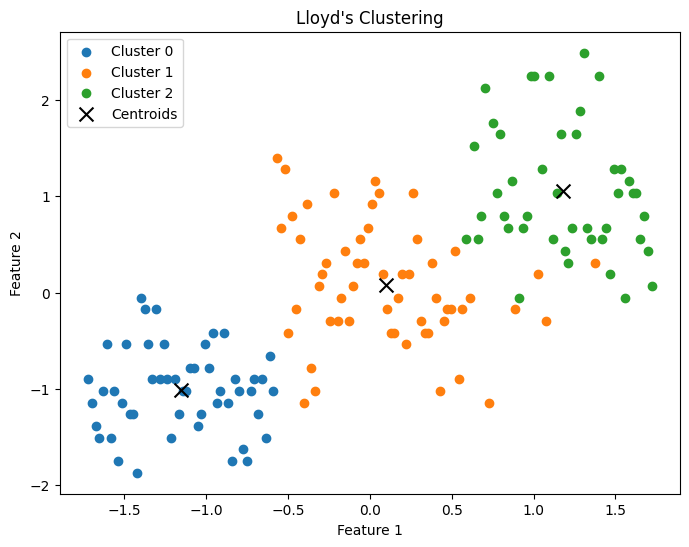

Silhouette Score (Lloyd): 0.45554068210880483


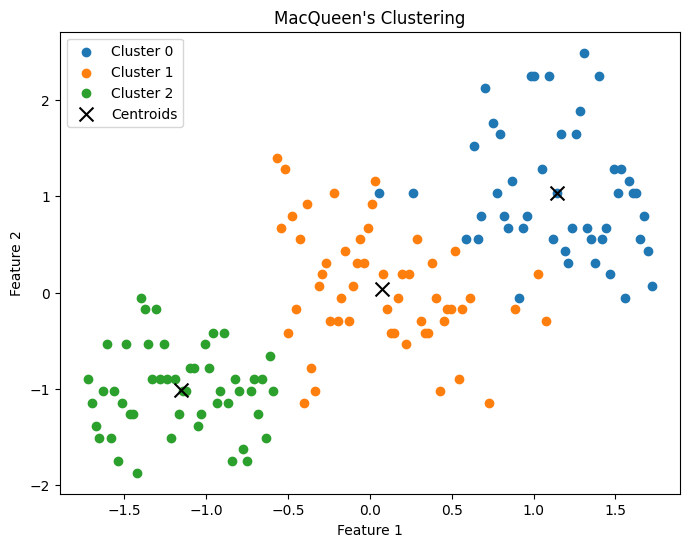

Silhouette Score (MacQueen): 0.452949780355554


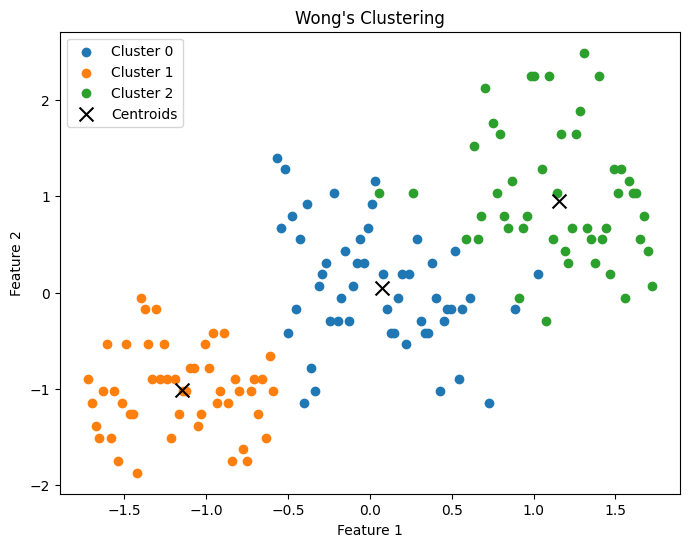

Silhouette Score (Wong): 0.4530499942064652


In [16]:
# 2D Visualization
def plot_clusters(data, clusters, centroids, title):
    plt.figure(figsize=(8, 6))
    for i in range(3):  # Assuming 3 clusters
        points = data[clusters == i]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Lloyd's Clustering
plot_clusters(df, clusters_lloyd, centroids_lloyd, "Lloyd's Clustering")
print("Silhouette Score (Lloyd):", silhouette_score(df, clusters_lloyd))

# MacQueen's Clustering
plot_clusters(df, clusters_macqueen, centroids_macqueen, "MacQueen's Clustering")
print("Silhouette Score (MacQueen):", silhouette_score(df, clusters_macqueen))

# Wong's Clustering
plot_clusters(df, clusters_wong, centroids_wong, "Wong's Clustering")
print("Silhouette Score (Wong):", silhouette_score(df, clusters_wong))


# Voronoi

<Figure size 800x600 with 0 Axes>

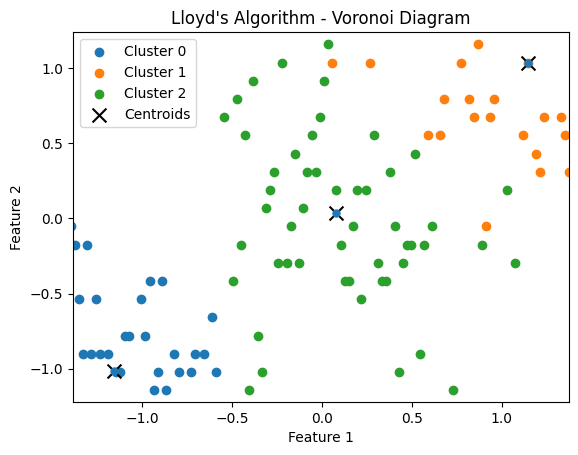

<Figure size 800x600 with 0 Axes>

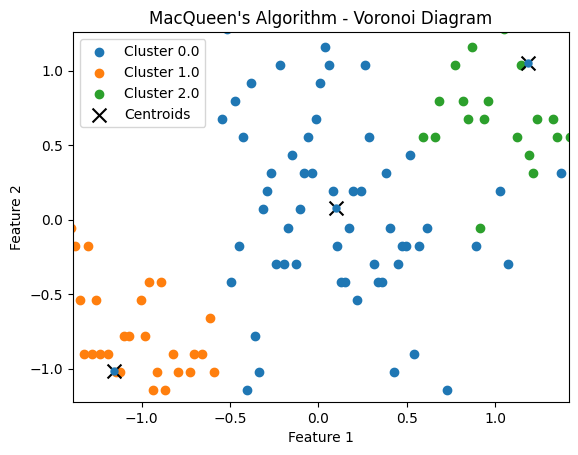

<Figure size 800x600 with 0 Axes>

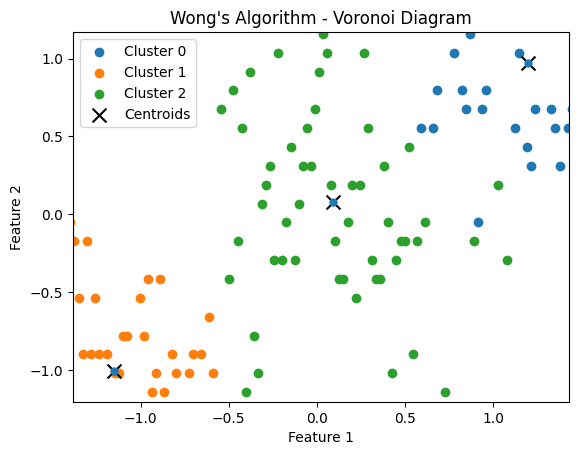

In [17]:

from scipy.spatial import Voronoi, voronoi_plot_2d


# Helper function to plot Voronoi diagrams
def plot_voronoi(data, centroids, clusters, title):
    # Project data to 2 dimensions for Voronoi diagram
    data_2d = data[:, :2]  # Select the first 2 features for 2D visualization
    centroids_2d = centroids[:, :2]  # Select the first 2 features for centroids

    # Create Voronoi diagram based on centroids in 2D
    vor = Voronoi(centroids_2d)

    # Plot the Voronoi diagram
    plt.figure(figsize=(8, 6))
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1.5, point_size=10)

    # Scatter plot of the data points with cluster colors
    for i in np.unique(clusters):
        cluster_points = data_2d[clusters == i]  # Use data_2d for plotting
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    # Plot the centroids
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='black', marker='x', s=100, label='Centroids')  # Use centroids_2d for plotting

    # Add title and legend
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Assume we have clustering results from Lloyd, MacQueen, and Wong
clusters_lloyd, centroids_lloyd = lloyd_kmeans(df, k=3)[:2]
clusters_macqueen, centroids_macqueen = macqueen_kmeans(df, k=3)[:2]
clusters_wong, centroids_wong = wong_kmeans(df, k=3)[:2]

# Lloyd's Voronoi Visualization
plot_voronoi(df[:, :2], centroids_lloyd, clusters_lloyd, "Lloyd's Algorithm - Voronoi Diagram")

# MacQueen's Voronoi Visualization
plot_voronoi(df[:, :2], centroids_macqueen, clusters_macqueen, "MacQueen's Algorithm - Voronoi Diagram")

# Wong's Voronoi Visualization
plot_voronoi(df[:, :2], centroids_wong, clusters_wong, "Wong's Algorithm - Voronoi Diagram")


#  Elbow Method

In [18]:

def calculate_wcss(data, clusters, centroids):
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss



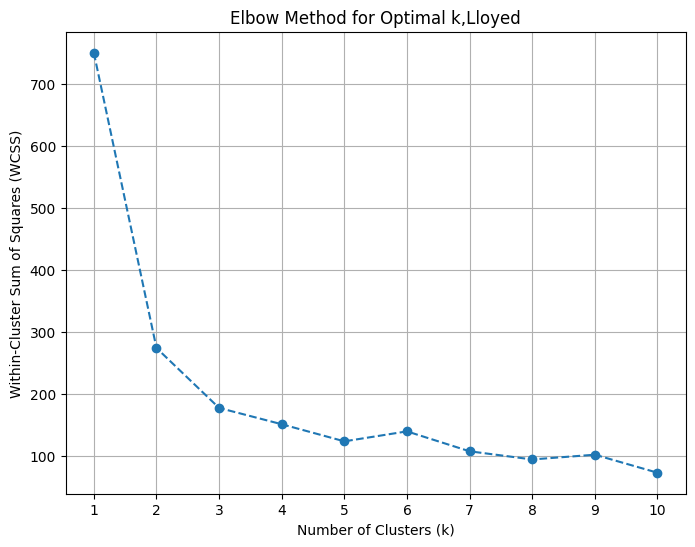

In [19]:
k_values = range(1, 11)  # Test k from 1 to 10
wcss_values = []

for k in k_values:
    clusters, centroids = lloyd_kmeans(df, k)
    wcss = calculate_wcss(df,clusters, centroids)
    wcss_values.append(wcss)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k,Lloyed')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

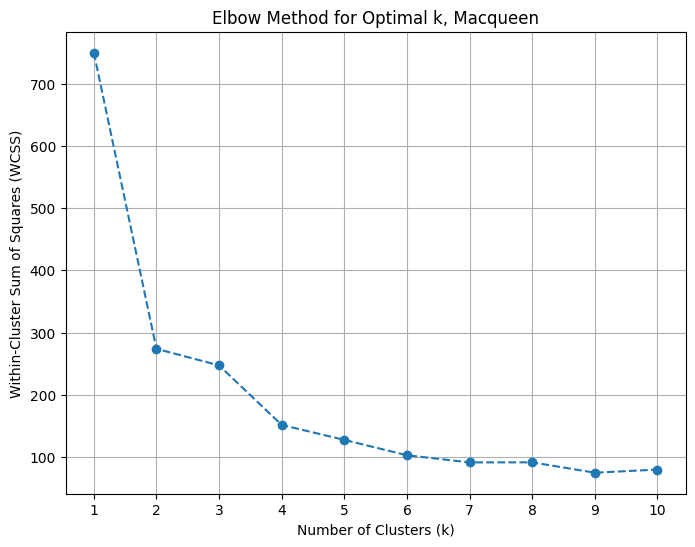

In [20]:
k_values = range(1, 11)  # Test k from 1 to 10
wcss_values = []

for k in k_values:
    clusters, centroids = macqueen_kmeans(df, k)
    wcss = calculate_wcss(df,clusters, centroids)
    wcss_values.append(wcss)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k, Macqueen')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

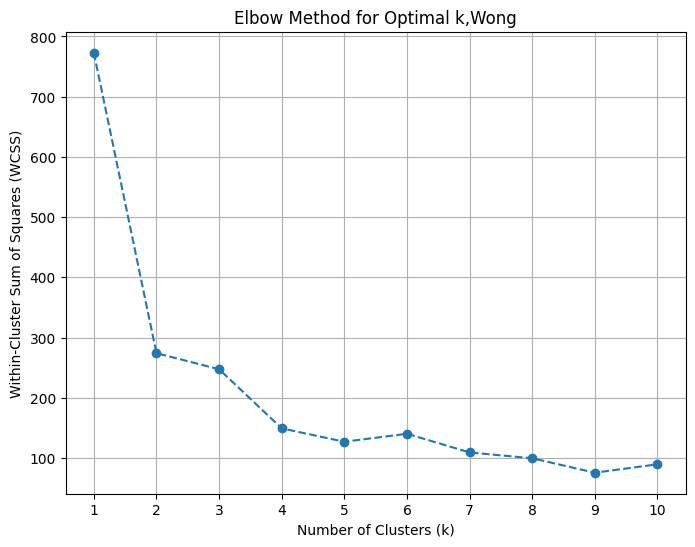

In [21]:
k_values = range(1, 11)  # Test k from 1 to 10
wcss_values = []

for k in k_values:
    clusters, centroids = wong_kmeans(df, k)
    wcss = calculate_wcss(df,clusters, centroids)
    wcss_values.append(wcss)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k,Wong')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()